John Lin

COMP790-166

HW1

Due: 2022-02-25

# Instructions

-   This homework is due at 11:59pm on February 25, 2022. **Please
    submit as a PDF** by email to natalies@cs.unc.edu+comp790.

-   You may write up your solutions in a Jupyter notebook, but please
    send it as a PDF so that it can be easily read and commented on. :)

-   Due to our current COVID situation, if for any reason you need more
    time on the homework, please try to let me know 24 hours before the
    deadline.

-   There are 3 data files provided for the following questions,
    including, , , and . Instructions for how to use these data will be
    provided in each homework problem.

-   You are welcome to any available libraries, like numpy and networkx.

-   Please feel free consult with other colleagues, but please write up
    your own independent solution.

-   You are welcome to use Python, Julia, or R here. All hints and
    sparse code are given for Python.

-   You are welcome to write up your assignment using the template, or
    write up the solutions in the method of your choice.

-   This homework is worth 70 points total.


In [542]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
import igraph as ig
import leidenalg as la
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

# Problem 1

**Warm Up - Counting and Adjacency Matrix Math** (9 Points Total)
Consider an undirected, unweighted graph with $N$ nodes and its
corresponding adjacency matrix, ${\bf A}$.

1.  (5 points) Consider a graph with $N$ nodes and its corresponding
    adjacency matrix, ${\bf A} \in \mathbb{R}^{N \times N}$. Let
    ${\bf 1} \in \mathbb{R}^{N}$ be the column vector of only 1s (e.g.
    $N$ 1s.) Using ${\bf A}$ and ${\bf 1}$, write an expression for a
    vector of node degrees, ${\bf k}$, such that the $i$th entry of
    ${\bf k}$, $k_{i}$, represents the number of neighbors of node $i$.
    (Hint, you should be writing this expression in terms of **A** and
    **1**.)

$\mathbf{k} = \mathbf{A} \times \mathbf{1}$

2.  (3 points) Again, using ${\bf A}$ and ${\bf 1}$ write an expression
    for the total number of edges in the graph.

$\frac{\sum_{i=1}^{N}(\mathbf{A} \times \mathbf{1})}{2}$

3.  (1 point) Verify the two expressions that you just defined by
    plugging the ${\bf A}$ defined below. Show that you get
    ${\bf k}=[1, 2 ,1]$ and that the number of edges in the graph is 2.
    You can show this by drawing the graph. You can either verify this
    by writing out the algebra or by writing code to compute the
    expressions and showing the output.

    $${\bf A}=\left(
    \begin{array}{ccc}
     0 & 1  & 0  \\
    1  & 0  & 1  \\
    0  & 1  & 0   
    \end{array}
    \right)$$




k is:
[[1]
 [2]
 [1]]


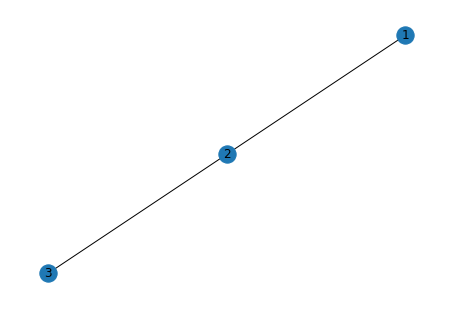

In [543]:
# compute expressions
A = np.array([[0, 1, 0],
              [1, 0, 1],
              [0, 1, 0]])
ones = np.array([[1],
                [1],
                [1]])
print("k is:\n"+str(np.matmul(A, ones)))


# draw the graph
G = nx.Graph() 
for i in range(A.shape[0]): 
 for j in range( A.shape[1]): 
   if A[i][j] == 1: 
      G.add_edge(i+1,j+1)
nx.draw(G, with_labels=True)
plt.show() 

                

# Problem 2

**Nice Properties of the Graph Laplacian** (14 Points Total)

-   Here we will walk through computing the Graph Laplacian and
    exploring nice properties about it that relate to graph structure.
    You are welcome to paste the code that you write for each of these
    sub-problems.

Consider the following graph, $\mathcal{G}$ of 6 nodes. This graph has
two components. We will see how what happens with our graph Laplacian in
this situation.

<span class="image">Graph, $\mathcal{G}$ with six nodes and two
components.</span>


1.  (3 points) Create the adjacency matrix, ${\bf A}$, corresponding to
    $\mathcal{G}$. (Note that node $i$ should correspond to the $i$th
    row of **A**.

![fig1](fig1.png)

In [544]:
A = np.array([[0, 1, 1, 0, 0, 0],
              [1, 0, 1, 0, 0, 0],
              [1, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 1, 0, 1],
              [0, 0, 0, 0, 1, 0]])
A

array([[0, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0]])

2.  (2 points) We will go through some steps to write the code to
    compute the Graph Laplacian. The first matrix we need to define is
    the diagonal degree matrix, ${\bf D}$. Create the degree matrix
    (${\bf D}$) for $\mathcal{G}$.

In [545]:
ones = np.ones([6, 1])
k = np.matmul(A, ones)
D = np.zeros([6, 6])
for i in range(0, k.shape[0]):
    for j in range(0, k.shape[0]):
        if i == j:
            D[i ,j] = k[j]
D

array([[2., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 0., 1.]])

3.  (2 points) Define the Laplacian matrix, ${\bf L}$ as
    ${\bf L}={\bf D}-{\bf A}$.

In [546]:
L = D - A
L

array([[ 2., -1., -1.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.],
       [-1., -1.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -1.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0., -1.,  1.]])

4.  (2 points) An eigenvector (${\bf v} \in \mathbb{R}^{6}$) and its
    corresponding eigenvalue ($\lambda$) of the graph Laplacian,
    ${\bf L}$, must satisfy ${\bf L}{\bf v} = \lambda {\bf v}$. As this
    graph has two components, we will be able to find two unique
    eigenvectors (${\bf v}_{1}$ and ${\bf v}_{2}$) that correspond to
    the zero eigenvalue, such that
    ${\bf L} \times {\bf v}_{1} = 0 \times {\bf v}_{1}$ and
    ${\bf L} \times {\bf v}_{2} = 0 \times {\bf v}_{2}$. Consider
    ${\bf v}_{1} = [1, 1, 1, 0, 0, 0]^{T}$. You will notice that there
    are 1s in the first three entries, corresponding to the nodes that
    are together in a component. Check that ${\bf v}_{1}$ does indeed
    correspond to eigenvalue 0 and satisfies
    ${\bf L} \times {\bf v}_{1} = 0 \times {\bf v}_{1}$.

    If you are using numpy, you can check by computing,

        L @ np.matrix([[1],[1],[1],[0],[0],[0]])

    Discuss your findings.

In [547]:
L @ np.matrix([[1], [1], [1], [0], [0], [0]])

matrix([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

The above shows that nodes 1, 2 and 3 (first 3 entries of ${\bf v}_{1}$ are 1) form 1 component and this corresponds to a 0 eigenvalue.
Therefore, when we perform ${\bf L} \times {\bf v}_{1}$ the result is a vector of length 6 with all entries = 0.

5.  (3 points) Given this pattern you just observed with ${\bf v}_{1}$,
    find ${\bf v}_{2}$. Show that your ${\bf v}_{2}$ satisfies
    ${\bf L} \times {\bf v}_{2} = 0 \times {\bf v}_{2}$.

    You can fill in the following with your entries of ${\bf v}_{2}$.

        L @ np.matrix([[ ],[ ],[ ],[ ],[ ],[ ]])

In [548]:
L @ np.matrix([[0], [0], [0], [1], [1], [1]])

matrix([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

The above similarly shows that nodes 4, 5 and 6 (last 3 entries of ${\bf v}_{2}$ are 1) form 1 component and this corresponds to a 0 eigenvalue.

6.  (2 points) As a further numerical experiment, find the eigenvalues
    of ${\bf L}$ (you can use
    <https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html#numpy.linalg.eig>).
    What do you notice about the smallest two eigenvalues? What about
    the third smallest eigenvalue?

In [549]:
w, v= np.linalg.eig(L)
w

array([ 3.00000000e+00, -4.44089210e-16,  3.00000000e+00,  3.00000000e+00,
        1.00000000e+00, -3.36770206e-17])

As shown above, the two smallest eigenvalues are -4.44e-16 and -3.37e-17 (which are very close to 0, but not exactly 0).
These correspond to the 0 eigenvectors and belong to separate components in this graph.
The third smallest eigenvalue is 1 and belongs to node 5.
Node 5 is the middle node connecting between nodes 4 and 6 ie node 5 shares a single edge with 2 other nodes.
The largest eigenvalue (3) corresponds to the subgraph containing nodes 1, 2 and 3, which are all connected to one another.

# Problem 3

(**A Single-Cell Graph in the Wild**) (3 points) A graph,
$\mathcal{G}_{cell}$ was constructed between 5000 cells contained in cell_graph.edgelist.
Make sure for the subsequent problems you interpret this as an
undirected graph and the adjacency matrix is symmetric.

![fig2](fig2.png)

-   (3 points) Use all of your hard work from Problem 2 to compute the
    graph Laplacian, ${\bf L}$ for $\mathcal{G}_{cell}$. Make a
    histogram to visualize the distribution of eigenvalues of ${\bf L}$.
    What is the smallest eigenvalue of ${\bf L}$? What are the smallest
    and second smallest eigenvalues of ${\bf L}$ and how does the
    observation relate to the structure of the graph?





In [550]:
cge = np.loadtxt('./cell_graph.edgelist')
cge.shape
# build adjacency matrix
A = np.zeros([5000, 5000])
A[1,1]
for index in range(0, cge.shape[0]):
    i = int(cge[index][0])
    j = int(cge[index][1])
    A[i, j] = 1

ones = np.ones([5000, 1])
# degrees...
k = np.matmul(A, ones)
D = np.zeros([5000, 5000])
for i in range(0, k.shape[0]):
    for j in range(0, k.shape[0]):
        if i == j:
            D[i ,j] = k[j]
L = D - A

(array([624., 618., 637., 628., 654., 645., 396., 282., 184., 133.,  73.,
         54.,  23.,  24.,  10.,   6.,   3.,   2.,   3.,   1.]),
 array([ 0.  ,  0.95,  1.9 ,  2.85,  3.8 ,  4.75,  5.7 ,  6.65,  7.6 ,
         8.55,  9.5 , 10.45, 11.4 , 12.35, 13.3 , 14.25, 15.2 , 16.15,
        17.1 , 18.05, 19.  ]),
 <a list of 20 Patch objects>)

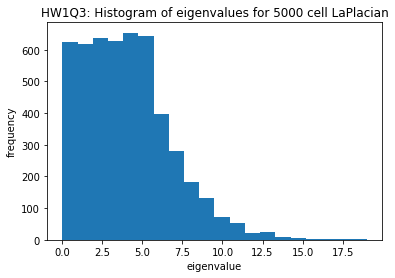

In [551]:
# determine eigenvalues and plot histogram
w, v= np.linalg.eig(L)
plt.title('HW1Q3: Histogram of eigenvalues for 5000 cell LaPlacian')
plt.xlabel('eigenvalue')
plt.ylabel('frequency')
plt.hist(w, bins=20)

In [552]:
# smallest eigenvalues
# w2 = np.c_[w, range(0, 5000)]   # create 2nd col for cell number
unique, counts = np.unique(w, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0. 624.]
 [  1. 618.]
 [  2. 637.]
 [  3. 628.]
 [  4. 654.]
 [  5. 645.]
 [  6. 396.]
 [  7. 282.]
 [  8. 184.]
 [  9. 133.]
 [ 10.  73.]
 [ 11.  54.]
 [ 12.  23.]
 [ 13.  24.]
 [ 14.  10.]
 [ 15.   6.]
 [ 16.   3.]
 [ 17.   2.]
 [ 18.   3.]
 [ 19.   1.]]


As shown above, the smallest eigenvalue is 0 with a count of 624.
This corresponds to the number of components or subgraphs in the graph structure.
By eye, there appears to be about ~10 well connected groups in the graph structure, but there could be many cells not connected to any others or connected to very few other cells.
The second smallest eigenvalue (excluding multiplicity) is 1 with a count of 618, giving a sense of the amount of connectivity in the subgraphs.
Including multiplicity of eigenvalues, the second smallest eigenvalue is also 0, indicating that the graph is not connected (ie there are nodes that are NOT connected to every other node).
The smallest eigenvalue should be 0 in any graph.



# Problem 4

(14 Points Total)

<span class="image">A visualization of the graph in homework problem
3.</span>

**Playing with Single Cell Data**  
We will consider data from a CyTOF experiment obtained from
<http://flowrepository.org/id/FR-FCM-ZZPH>. Here, we are considering the
expression of 13 different protein markers across a set of cells. It has
already been pre-processed for you. From the entire dataset, 5,000 cells
were sampled for further analysis. You can use the following
accompanying data as follows.

-   Levine_matrix.csv is the cell $\times$ marker matrix. Note that the last column is
    labels for the cells. Let’s call this matrix, ${\bf X}$. <span
    style="color: blue">**You should not use the last column (named
    label) for any kind of clustering.**</span> Some cells are not
    labeled (hence are called NaN).

-   population_names_Levine_13dim.txt maps the cell labels from the last column of ${\bf X}$ (number
    labels) to biologically-interpretable cell-type names.

-   cell_graph.edgelist is an edgelist for a between-cell graph. We will call this, **G**.
    Note that the nodes in ${\bf G}$ correspond to the rows in
    ${\bf X}$. So, node $i$ maps to row $i$ of ${\bf X}$, etc.

1) **Clustering on cell $\times$ marker data** (7 points): Use a
clustering algorithm of your choice to generate a cell-to-cluster
partition for the cells, using the matrix, ${\bf X}$. Use normalized
mutual information (NMI) to compute overlap between the true and
predicted cell labels. <span style="color: blue">**Note that because not
all cells are labeled, you can compute this only based on the labeled
cells.**</span> Feel free to use an available implementation, such as,
<https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html>.  





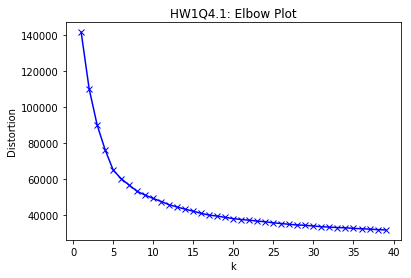

/Users/johnlin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


0.8318787424843331

In [553]:
df = np.genfromtxt('./Levine_matrix.csv', skip_header = 1, delimiter = ',', dtype = float)
origlabels = df[:, 13]
truelabels = origlabels
# remove the last column of labels
df = np.delete(df, np.s_[-1:], axis=1)
# (unique, counts) = np.unique(df[:,13], return_counts=True)
# frequencies = np.asarray((unique, counts)).T
# frequencies[0:30]
# 24 cell types...

# apply kmeans clustering
# determine k
distortions = []
K = range(1,40)
for k in K:
    k_cluster = KMeans(n_clusters=k, random_state=0).fit(df)
    distortions.append(k_cluster.inertia_)
# elbow plot
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('HW1Q4.1: Elbow Plot')
plt.show()

# code to remov NaNs before fitting model
# index = np.argwhere(np.isnan(truelabels))
# df = np.delete(df, index,axis=0)
# df.shape

# plot shows that k = 25 appears ok to use
kmeans = KMeans(n_clusters=25, random_state=0).fit(df)
predlabels1 = kmeans.labels_
# remove dtype at the end of the ndarray
predlabels1 = predlabels1.astype(np.float)
# remove NaNs
index = np.argwhere(np.isnan(truelabels))
truelabels = np.delete(truelabels, index)
predlabels1 = np.delete(predlabels1, index)
# predlabels1 = np.delete(predlabels1, index)
normalized_mutual_info_score(truelabels, predlabels1)

2) **Graph Partitioning** (7 points): Use a graph clustering algorithm
to partition ${\bf G}$ into clusters. Similar to part 1 (1) compute NMI
between the labels obtained in graph partitioning and the true cell
labels.  


In [554]:
G = ig.Graph.Read_Edgelist('./cell_graph.edgelist')
partition = la.find_partition(G, la.ModularityVertexPartition, seed=0)
# partition.membership
# np.unique(partition.membership)
# print(partition)
# so partition.memberhsip contains clusters for each node. ordered by node
# remove the predicted labels that do not have a known type
predlabels2 = partition.membership
predlabels2 = np.delete(predlabels2, index)
normalized_mutual_info_score(truelabels, predlabels2)

0.8626426260194897

3) (3 points) Comment on any observations you observe between the
quality of the partitions obtained clustering on ${\bf X}$ in comparison
to partitioning ${\bf G}$. Which approach do you think works better,
using the original data, or the graph?  


It looks like using Leiden works better than using k-means clustering alone.
Using defaults, NMI using Leiden is greater than the NMI using k-means (0.86 > 0.83), as shown above.
With k-means, I input 25 clusters into the algorithm, which is close to the actual number of clusters (24).
With Leiden, there were 17 unique clusters (lower than the actual number of clusters).
However, the NMI with Leiden is higher, indicating that the true positive classfications with Leiden is greater.

4) **Rare Cell-types** (5 points) Plasmacytoid_DC_cells, or pDCs (label 21) are a popular
rare cell type, meaning many clustering algorithms will not be able to
reliably find them. Report the number of distinct clusters where you
found pDCs in both the clustering of ${\bf X}$ and in the partitioning
of ${\bf G}$.  


In [555]:
# how many are labeled 21...
print("Number of pDCs: "+str(len(truelabels[truelabels==21])))
# X k means clusters of pDCs
print("Breakdown of pDC clusters using k means [cluster, count]: \n")
(unique, counts) = np.unique(predlabels1[np.argwhere(truelabels==21)], return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)
print("Number of pDCs in cluster 4: "+str(len(predlabels1[np.argwhere(predlabels1==4)])))
# G leiden graph partitioning
print("Breakdown of pDC clusters using Leiden [cluster, count]: \n")
(unique, counts) = np.unique(predlabels2[np.argwhere(truelabels==21)], return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)
print("Number of pDCs in cluster 13: "+str(len(predlabels2[np.argwhere(predlabels2==13)])))

Number of pDCs: 10
Breakdown of pDC clusters using k means [cluster, count]: 

[[ 4. 10.]]
Number of pDCs in cluster 4: 24
Breakdown of pDC clusters using Leiden [cluster, count]: 

[[13 10]]
Number of pDCs in cluster 13: 21


Using k means clustering of $\textbf{X}$, we see the 10 cells truly labeled 21 clustered into the same cluster (ie 1 distinct cluster) along with 14 other cells.
Using Leiden graph partitioning of $\textbf{G}$, we see the 10 cells truly labeled 21 clustered into the same cluster (ie 1 distinct cluster) along with 11 other cells.
So, in both cases, there is some merging with other cell types.

5) **Cell Classification** (10 points) Select cells from ${\bf X}$ with
the following labels, $\{11, 12, 17, 18\}$ and $\{1,2,3\}$. In general,
cells with labels $\{11, 12, 17, 18\}$ are T-cells and cells with labels
$\{1,2,3\}$ are monocytes. Convert this to a binary classification
problem by labeling T-cells with 0 and monocytes with 1. Use your
favorite classifier to predict the labels of these cells. Use an ROC
curve to visualize the performance. If the performance was not good,
explain what could have gone wrong. If your performance is very good,
can you identify features from ${\bf X}$ that were helpful in predicting
labels?

In [556]:
df = np.genfromtxt('./Levine_matrix.csv', skip_header = 1, delimiter = ',', dtype = float)
origlabels = df[:, 13]
df = np.delete(df, np.s_[-1:], axis=1)
index1 = np.argwhere(np.isin(origlabels, [11, 12, 17, 18]))
index2 = np.argwhere(np.isin(origlabels, [1, 2, 3]))
tmlabels = origlabels
# label t cells with 0 and monocytes with 1
tmlabels[index1] = 0
tmlabels[index2] = 1
# after values are changed it looks like the index1 and index 2 change, so need to re evaluate with 0,1 values
# index1 = np.argwhere(np.isin(origlabels, [0]))
# index2 = np.argwhere(np.isin(origlabels, [1]))
y = np.concatenate((tmlabels[index1], tmlabels[index2]), axis=0)
y = y.reshape(1332)
X = df[np.concatenate((index1, index2))]
X = X.reshape(1332,13)
# X = X[0:1332,0:1] testing with feewer features - this will decrease performance of ROC
# split between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# fit logistic regression
clf = lr(random_state=0).fit(X_train, y_train)

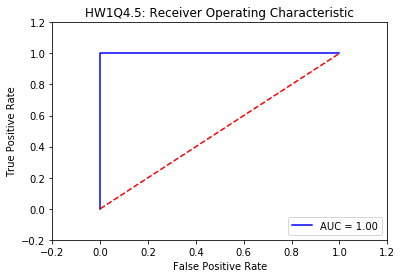

In [557]:
# generate ROC
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('HW1Q4.5: Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/Users/johnlin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/johnlin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


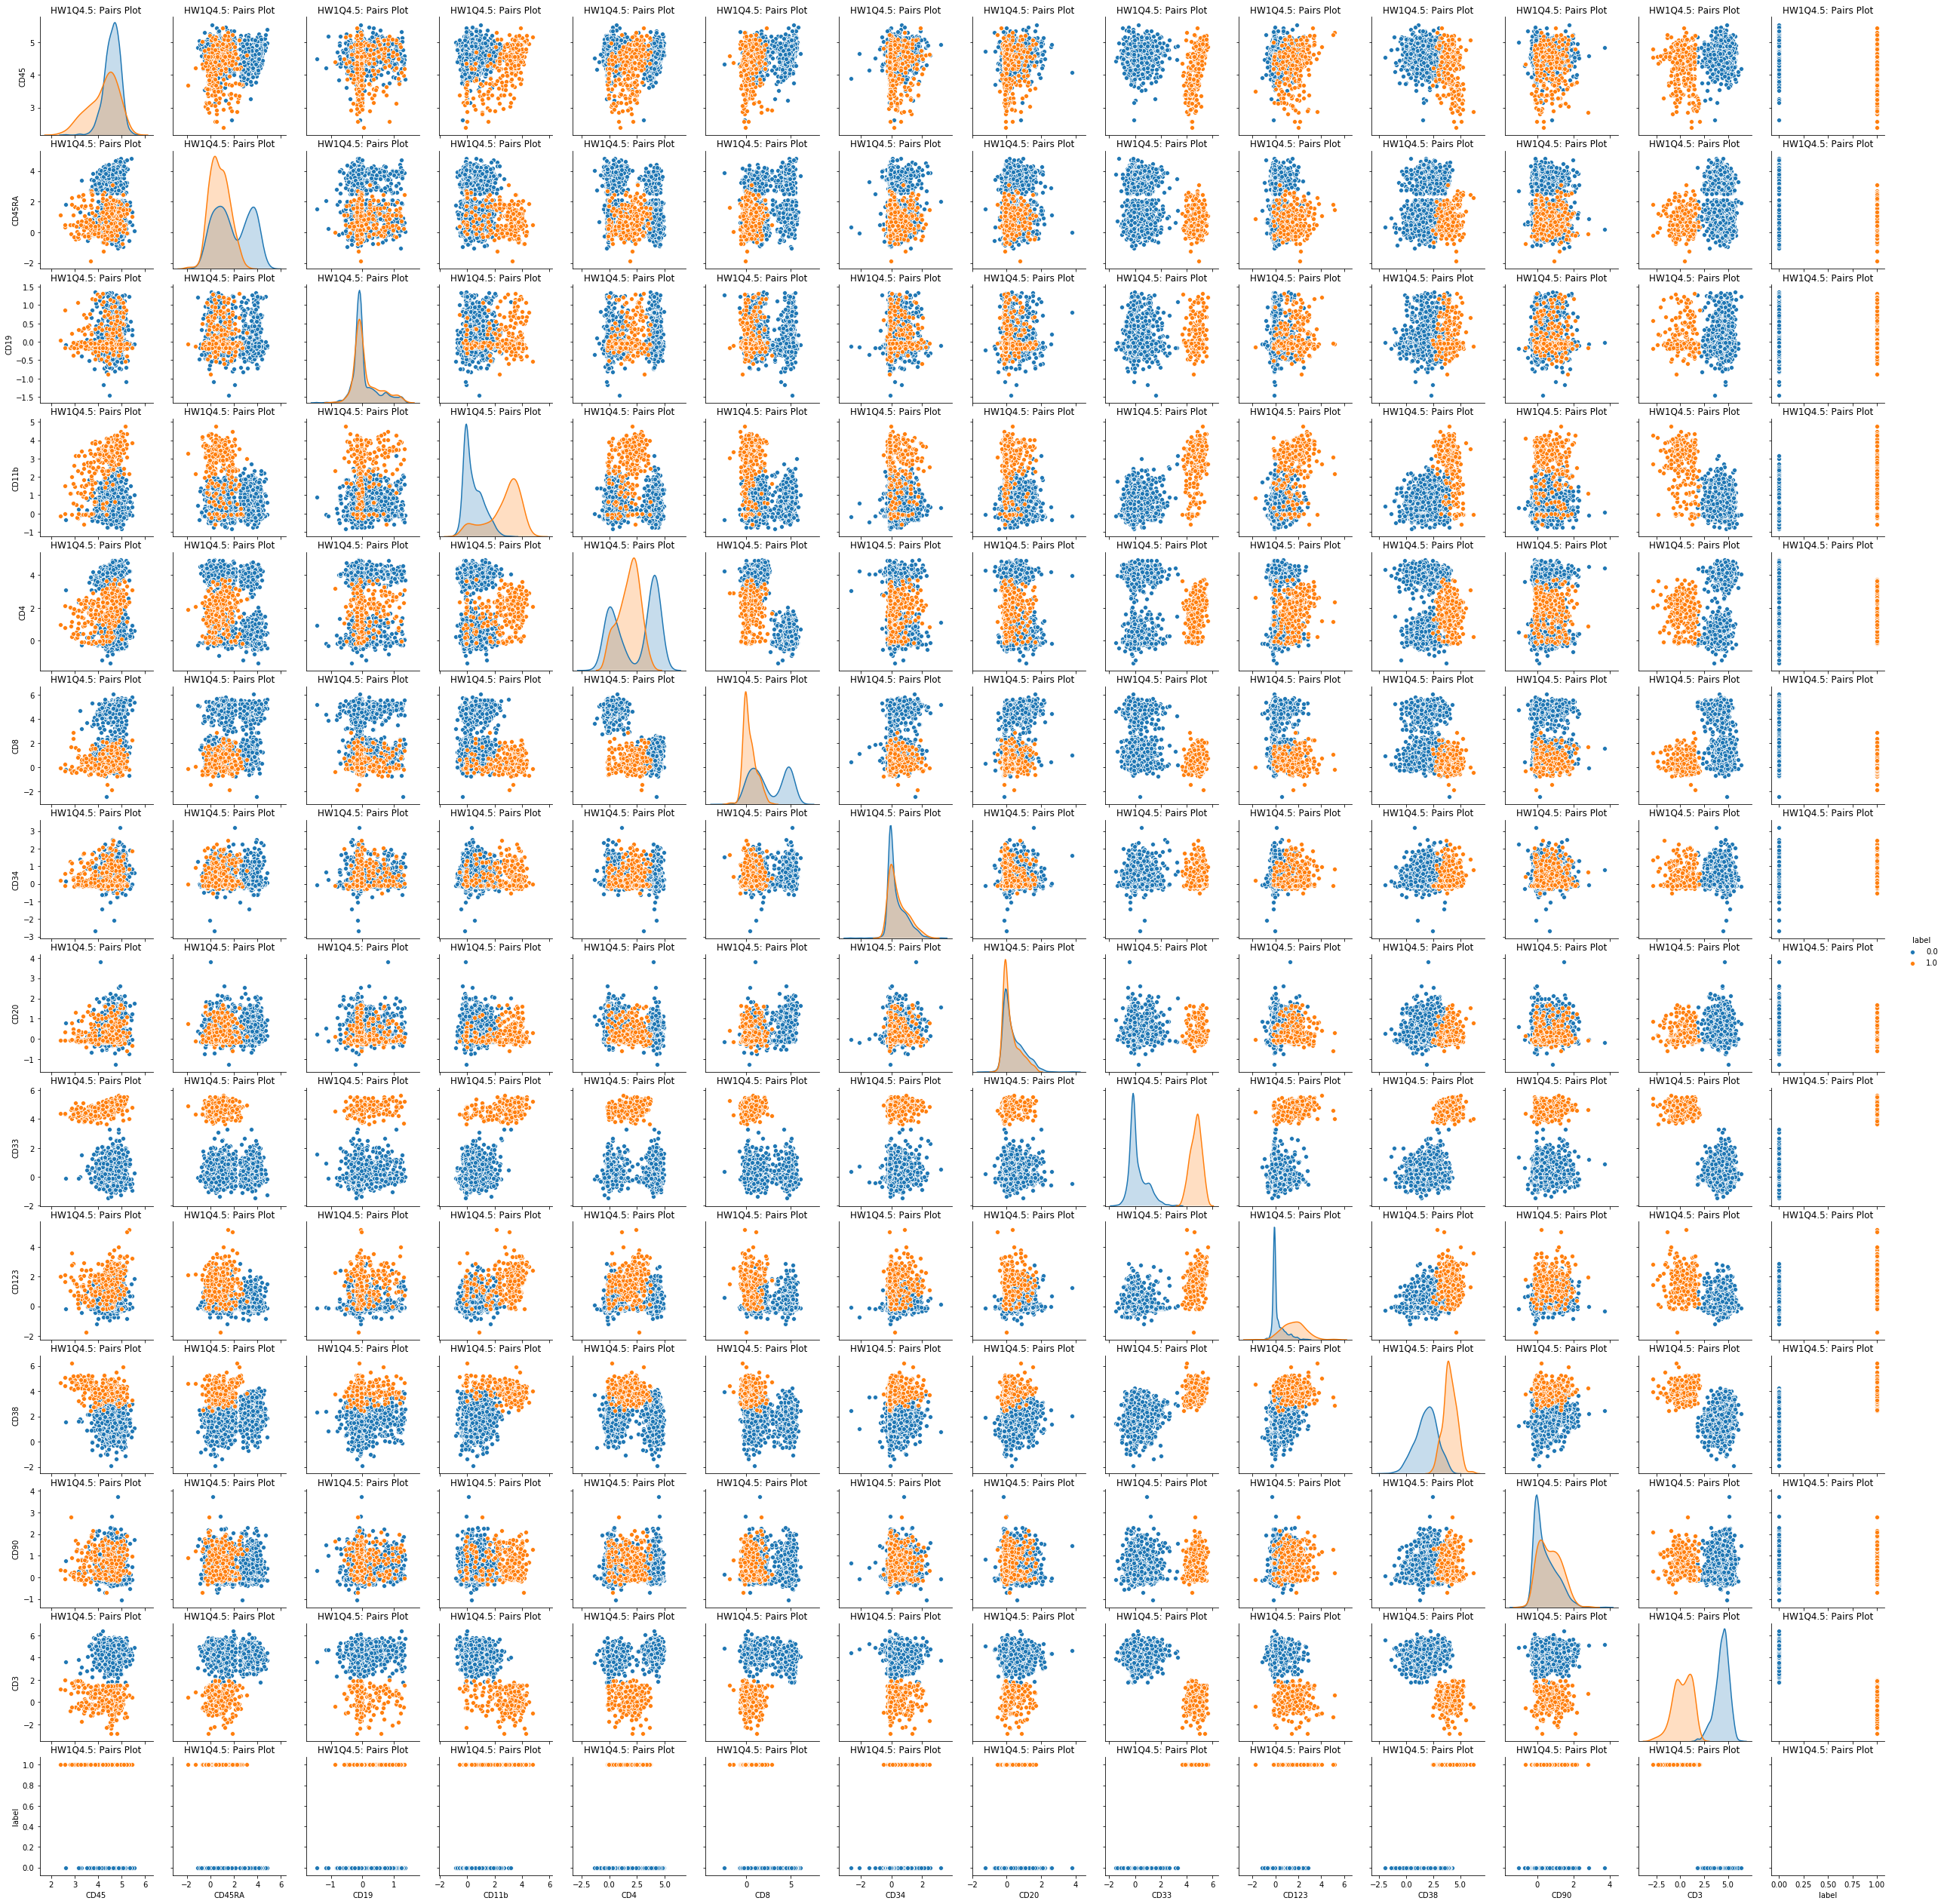

In [558]:
# explore the data...
# combine data with labels
df = np.c_[X, y]
# get marker names
features = np.genfromtxt('./Levine_matrix.csv', delimiter = ',', dtype = str)
features = features[0,]
# look at pairs plot to see if any good markers between the 2 classes
df = pd.DataFrame(df, columns = features)
sns.pairplot(df, hue = 'label').set(title='HW1Q4.5: Pairs Plot')



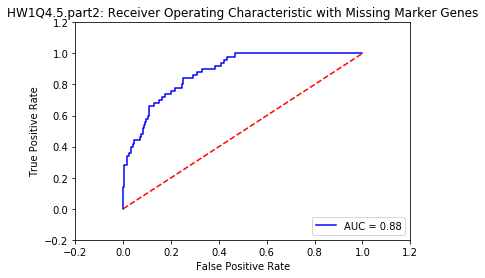

In [559]:
df = np.genfromtxt('./Levine_matrix.csv', skip_header = 1, delimiter = ',', dtype = float)
origlabels = df[:, 13]
df = np.delete(df, np.s_[-1:], axis=1)
df = np.delete(df, [3, 4, 10, 8, 9, 12], axis=1) #getting rid of marker genes worsens performance 
index1 = np.argwhere(np.isin(origlabels, [11, 12, 17, 18]))
index2 = np.argwhere(np.isin(origlabels, [1, 2, 3]))
tmlabels = origlabels
# label t cells with 0 and monocytes with 1
tmlabels[index1] = 0
tmlabels[index2] = 1
# after values are changed it looks like the index1 and index 2 change, so need to re evaluate with 0,1 values
# index1 = np.argwhere(np.isin(origlabels, [0]))
# index2 = np.argwhere(np.isin(origlabels, [1]))
y = np.concatenate((tmlabels[index1], tmlabels[index2]), axis=0)
y = y.reshape(1332)
X = df[np.concatenate((index1, index2))]
X = X.reshape(1332,7)
# X = X[0:1332,0:1] testing with feewer features - this will decrease performance of ROC
# split between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# fit logistic regression
clf = lr(random_state=0).fit(X_train, y_train)
# generate ROC
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('HW1Q4.5.part2: Receiver Operating Characteristic with Missing Marker Genes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The ROC curve shows very good performance with logistic regression having AUC = 1 even after an 80:20 train:test split.
From the pairs plot above, it looks like CD33 and CD3 distinguish between the 2 classes well.
Additionally, CD11b and CD38 appear somewhat helpful.
When we remove CD11b, CD4, CD33, CD123, CD38 and CD3, we see AUC notably decrease to 0.88 as in the 2nd ROC plot above.
Even without these marker genes, logistic regression seems to perform reasonably well.

# Problem 5

(30 points total) **node2vec**  
We will use the implementation of node2vec available in github,
<https://github.com/aditya-grover/node2vec> to create vector
representations for each node in ${\bf G}$ encoded in cell_graph.edgelist.  
1) (**Clustering on Node2Vec Features** (10 points)) First, use default
parameters and follow the instructions in the README on the graph in  cell_graph.edgelist.
This will create a 128-dimensional vector for each node. Cluster the
nodes based on these vectors and compare to the ground truth labels in
the last column of Levine_matrix.csv using NMI. Compare your results to Problem 4,
question 3. Does an embedding of the graph offer any apparent advantages
in classifying cells?  


In [560]:
# using https://github.com/aditya-grover/node2vec/pull/68...
%run ./node2vec/src/main.py --input ./cell_graph.edgelist --output ./cell_graph_128.emd

Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


In [561]:
# cluster nodes based on vectors - use kmeans
emd = np.genfromtxt('./cell_graph_128.emd', skip_header = 1, delimiter = ' ', dtype = float)
# store the node ids
nodes = emd[:,0]
# sort by node id
emd = emd[np.argsort(emd[:, 0])]
# remove the first column of node ids
emd = np.delete(emd, 0, axis=1)
# cluster using kmeans
kmeans = KMeans(n_clusters=24, random_state=0).fit(emd)
# get predictions
predlabels4 = kmeans.labels_
# remove dtype at the end of the ndarray
predlabels4 = predlabels4.astype(np.float)
# regenerate truelabels
df = np.genfromtxt('./Levine_matrix.csv', skip_header = 1, delimiter = ',', dtype = float)
truelabels = df[:, 13]
# remove NaNs
index = np.argwhere(np.isnan(truelabels))
truelabels = np.delete(truelabels, index)
predlabels4 = np.delete(predlabels4, index)
normalized_mutual_info_score(predlabels4, truelabels)

/Users/johnlin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


0.8006207228780202

Compared to Problem 4, question3, NMI decreases to 0.80 as shown above.
Previously using the Levine_matrix.csv with k means clustering or cell_graph.edgelist with Louvain graph partitioning, NMIs were higher (0.83 and 0.86, respectively).
So, the graph embedding here to a 128 dimensional vector for each node does not immediately appear to offer any advantages.
node2vec uses random walks and co occurence statistics to optimize the low dimensional embeddings.
Overall, this allows control of the neighborhoods (structural similarity between nodes) and role (type of nodes connected with).
In this case, since we are already working with a small number of features (13), perhaps this low dimensional embedding is not as useful here.

2) (**Parameters, part 1** (5 points)) Try a few different values for
the number of dimensions --dimensions, such that some of them are less than 128, and
some of them are more than 128. Cluster cells again with the embeddings
obtained in different dimensions. Again, you can compute the NMI between
the cluster assignments and the ground truth labels. Comment on some
observations, and show a plot of NMI plotted against the number of
dimensions used.  


In [562]:
# run node2vec across different dimensions
%run ./node2vec/src/main.py --input ./cell_graph.edgelist --output ./cell_graph_020.emd --dimensions 20
%run ./node2vec/src/main.py --input ./cell_graph.edgelist --output ./cell_graph_040.emd --dimensions 40
%run ./node2vec/src/main.py --input ./cell_graph.edgelist --output ./cell_graph_060.emd --dimensions 60
%run ./node2vec/src/main.py --input ./cell_graph.edgelist --output ./cell_graph_080.emd --dimensions 80
%run ./node2vec/src/main.py --input ./cell_graph.edgelist --output ./cell_graph_100.emd --dimensions 100
%run ./node2vec/src/main.py --input ./cell_graph.edgelist --output ./cell_graph_140.emd --dimensions 140
%run ./node2vec/src/main.py --input ./cell_graph.edgelist --output ./cell_graph_160.emd --dimensions 160
%run ./node2vec/src/main.py --input ./cell_graph.edgelist --output ./cell_graph_180.emd --dimensions 180
%run ./node2vec/src/main.py --input ./cell_graph.edgelist --output ./cell_graph_200.emd --dimensions 200
%run ./node2vec/src/main.py --input ./cell_graph.edgelist --output ./cell_graph_220.emd --dimensions 220
%run ./node2vec/src/main.py --input ./cell_graph.edgelist --output ./cell_graph_900.emd --dimensions 900

Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


In [563]:
# create array of dimensions used above
dimarr = [20, 40, 60, 80, 100, 128, 140, 160, 180, 200, 220, 900]
# regenerate truelabels
df = np.genfromtxt('./Levine_matrix.csv', skip_header = 1, delimiter = ',', dtype = float)
truelabels = df[:, 13]
# remove NaNs
index = np.argwhere(np.isnan(truelabels))
truelabels = np.delete(truelabels, index)

# create function to calculate NMI
def calc_nmi_per_dim(dimarr, truelabels, index):
    nmiarr = []
    # read in emd
    for dim in dimarr:
        # read file
        emd = np.genfromtxt('./cell_graph_'+str(dim).zfill(3)+'.emd', skip_header = 1, delimiter = ' ', dtype = float)
        # sort by node id so that order corresponds to order of truelabels and we can appropriately remove NaNs
        emd = emd[np.argsort(emd[:, 0])]
        # remove the first column of node ids
        emd = np.delete(emd, 0, axis=1)
        # cluster using kmeans
        kmeans = KMeans(n_clusters=24, random_state=0).fit(emd)
        # get predictions
        predlabels4 = kmeans.labels_
        # remove dtype at the end of the ndarray
        predlabels4 = predlabels4.astype(np.float)
        # remove NaNs
        predlabels4 = np.delete(predlabels4, index)
        nmi = normalized_mutual_info_score(predlabels4, truelabels)
        nmiarr.append(nmi)
    return(nmiarr)

# run function
nmiarr = calc_nmi_per_dim(dimarr, truelabels, index)




/Users/johnlin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/johnlin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/johnlin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: Dep

         nmi  dimension
0   0.790521         20
1   0.793909         40
2   0.787066         60
3   0.773025         80
4   0.779052        100
5   0.800621        128
6   0.790112        140
7   0.797027        160
8   0.783178        180
9   0.781239        200
10  0.769836        220
11  0.778942        900


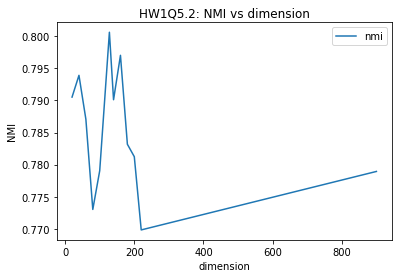

In [564]:
# plot nmi vs dimension
df = pd.DataFrame({'nmi':nmiarr, 'dimension':dimarr,})
df.plot('dimension', 'nmi')
plt.title('HW1Q5.2: NMI vs dimension')
plt.ylabel('NMI')
print(df)

Looking at the plot above, it looks like NMI (0.80) peaks around number of dimensions ~ 128.
There appears to be some oscillation while increasing the number of dimensions.
This may indicate a 128 dimensional vector embedding (the default) may be more useful for this type of data.
It should be noted that there appears little variation across the range of dimensions used (20 to 900) with NMI ranging from 0.77 to 0.80.
So, dimension, may not have a large effect on NMI at least across this range of dimensions.

3) (**Parameters, part 2** (5 points)) Recall that the parameters $p$
and $q$ control the ‘breadth’ vs ‘depth of the walk’. Choose one of
these parameters to vary, and repeat the previous question using the
default 128 dimensions, but varying values for either $p$ or $q$.
Comment on some observations, and show a plot of NMI against $p$ or $q$
(whichever one you chose).  


In [565]:
# run node2vec across different p
%run ./node2vec/src/main.py --input ./cell_graph.edgelist --output ./cell_graph_128_p03.emd --p 0.003
%run ./node2vec/src/main.py --input ./cell_graph.edgelist --output ./cell_graph_128_p06.emd --p 0.6
%run ./node2vec/src/main.py --input ./cell_graph.edgelist --output ./cell_graph_128_p09.emd --p 0.9
%run ./node2vec/src/main.py --input ./cell_graph.edgelist --output ./cell_graph_128_p10.emd --p 1
%run ./node2vec/src/main.py --input ./cell_graph.edgelist --output ./cell_graph_128_p15.emd --p 1.5
%run ./node2vec/src/main.py --input ./cell_graph.edgelist --output ./cell_graph_128_p20.emd --p 2
%run ./node2vec/src/main.py --input ./cell_graph.edgelist --output ./cell_graph_128_p50.emd --p 5

Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


In [573]:
# create array of dimensions used above
parr = [0.3, 0.6, 0.9, 1, 1.5, 2, 5]
# regenerate truelabels
df = np.genfromtxt('./Levine_matrix.csv', skip_header = 1, delimiter = ',', dtype = float)
truelabels = df[:, 13]
# remove NaNs
index = np.argwhere(np.isnan(truelabels))
truelabels = np.delete(truelabels, index)

# create function to calculate NMI
def calc_nmi_per_p(parr, truelabels, index):
    nmiarr = []
    # read in emd
    for p in parr:
        # read file
        emd = np.genfromtxt('./cell_graph_128_p'+str(int(p*10)).zfill(2)+'.emd', skip_header = 1, delimiter = ' ', dtype = float)
        # sort by node id so that order corresponds to order of truelabels and we can appropriately remove NaNs
        emd = emd[np.argsort(emd[:, 0])]
        # remove the first column of node ids
        emd = np.delete(emd, 0, axis=1)
        # cluster using kmeans
        kmeans = KMeans(n_clusters=24, random_state=0).fit(emd)
        # get predictions
        predlabels4 = kmeans.labels_
        # remove dtype at the end of the ndarray
        predlabels4 = predlabels4.astype(np.float)
        # remove NaNs
        predlabels4 = np.delete(predlabels4, index)
        nmi = normalized_mutual_info_score(predlabels4, truelabels)
        nmiarr.append(nmi)
    return(nmiarr)

# run function
nmiarr = calc_nmi_per_p(parr, truelabels, index)




/Users/johnlin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/johnlin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/johnlin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: Dep

        nmi      p
0  0.702924  0.003
1  0.793645  0.600
2  0.781390  0.900
3  0.774827  1.000
4  0.792346  1.500
5  0.786855  2.000
6  0.796574  5.000


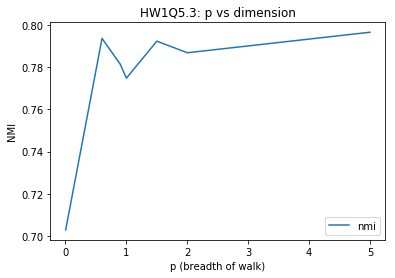

In [574]:
# plot nmi vs p
parr[0] = 0.003
df = pd.DataFrame({'nmi':nmiarr, 'p':parr,})
df.plot('p', 'nmi')
plt.title('HW1Q5.3: p vs dimension')
plt.ylabel('NMI')
plt.xlabel('p (breadth of walk)')
print(df)

Lower values of p encourage local walks, increasing the likelihood of revisiting neighboring nodes.
$p = 5$ shows the highest NMI of ~0.80. 
The NMI varies a bit more (~0.70 to ~0.79) across the range of p values (0.003 to 5).
The default p value used is 1.
Very low values of p appear to be less favorable as when $p = 0.003$, $NMI = 0.70$.
Past $p=0.6$, NMI seems to hover around 0.79.

4) (**Cell Classification, Part II** (10 points)) Repeat Problem 4,
question (5). However, instead of using only ${\bf X}$ as the feature
matrix, we are going to combine the marker expressions with node2vec
features. Let ${\bf N}$ be your matrix generated through node2Vec.
Create a new matrix called ${\bf X}=[{\bf X} | {\bf N}]$. That is, you
will simply concatenate ${\bf X}$ and ${\bf N}$. Formulate the same
classification problem from Problem 4, question (5) to classify T-cells
from monocytes. Again, report your ROC curve. Comment on the
performance, especially in comparison to the results obtained in Problem
4, question (5).

In [568]:
# generate X
X = np.genfromtxt('./Levine_matrix.csv', skip_header = 1, delimiter = ',', dtype = float)
origlabels = X[:, 13]
truelabels = origlabels
# remove the last column of labels
X = np.delete(X, np.s_[-1:], axis=1)

# generate N
N = np.genfromtxt('./cell_graph_128.emd', skip_header = 1, delimiter = ' ', dtype = float)
# store the node ids
nodes = N[:,0]
# sort by node id
N = N[np.argsort(N[:, 0])]
# remove the first column of node ids
N = np.delete(N, 0, axis=1)

# combine X and N
X = np.concatenate((X, N), axis=1)

In [569]:
index1 = np.argwhere(np.isin(origlabels, [11, 12, 17, 18]))
index2 = np.argwhere(np.isin(origlabels, [1, 2, 3]))
tmlabels = origlabels
# label t cells with 0 and monocytes with 1
tmlabels[index1] = 0
tmlabels[index2] = 1
# after values are changed it looks like the index1 and index 2 change, so need to re evaluate with 0,1 values
index1 = np.argwhere(np.isin(origlabels, [0]))
index2 = np.argwhere(np.isin(origlabels, [1]))
y = np.concatenate((tmlabels[index1], tmlabels[index2]), axis=0)
y = y.reshape(1332)
X = X[np.concatenate((index1, index2))]
X.shape
X = X.reshape(1332,141)
# X = X[0:1332,0:1] testing with feewer features - this will decrease performance of ROC
# split between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# fit logistic regression
clf = lr(random_state=0).fit(X_train, y_train)

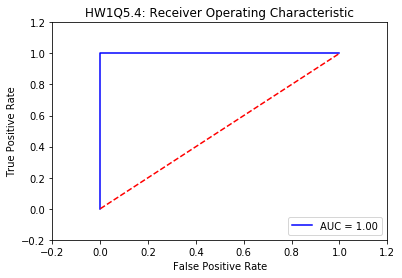

In [570]:
# generate ROC
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('HW1Q5.4: Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

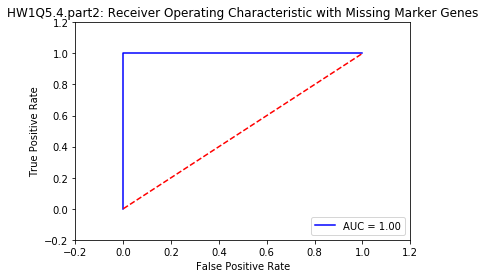

In [575]:
# generate X
X = np.genfromtxt('./Levine_matrix.csv', skip_header = 1, delimiter = ',', dtype = float)
origlabels = X[:, 13]
truelabels = origlabels
# remove the last column of labels
X = np.delete(X, np.s_[-1:], axis=1)
X = np.delete(X, [3, 4, 10, 8, 9, 12], axis=1) #getting rid of marker genes worsens performance 

# generate N
N = np.genfromtxt('./cell_graph_128.emd', skip_header = 1, delimiter = ' ', dtype = float)
# store the node ids
nodes = N[:,0]
# sort by node id
N = N[np.argsort(N[:, 0])]
# remove the first column of node ids
N = np.delete(N, 0, axis=1)

# combine X and N
X = np.concatenate((X, N), axis=1)

index1 = np.argwhere(np.isin(origlabels, [11, 12, 17, 18]))
index2 = np.argwhere(np.isin(origlabels, [1, 2, 3]))
tmlabels = origlabels
# label t cells with 0 and monocytes with 1
tmlabels[index1] = 0
tmlabels[index2] = 1
# after values are changed it looks like the index1 and index 2 change, so need to re evaluate with 0,1 values
index1 = np.argwhere(np.isin(origlabels, [0]))
index2 = np.argwhere(np.isin(origlabels, [1]))
y = np.concatenate((tmlabels[index1], tmlabels[index2]), axis=0)
y = y.reshape(1332)
X = X[np.concatenate((index1, index2))]
X.shape
X = X.reshape(1332,135)
# X = X[0:1332,0:1] testing with feewer features - this will decrease performance of ROC
# split between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# fit logistic regression
clf = lr(random_state=0).fit(X_train, y_train)

# generate ROC
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('HW1Q5.4.part2: Receiver Operating Characteristic with Missing Marker Genes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Combining the marker expression data (13 features) with the graph embeddings (128 dimensions) results in 141 features.
Since the ROC already showed performance with AUC = 1 as in Problem 4, question 5, we see the same result here.
It appears that the additional features of the graph embeddings do not hinder the result.
In the second ROC plot above, we removed genes CD11b, CD4, CD33, CD123, CD38 and CD3.
Combining the remaining set of genes with the graph embedding features increase AUC to 1 compared 0.88 observed in Problem 4, question 5, showing that the embeddings do appear to assist in classification.